<a href="https://colab.research.google.com/github/YoonSuYeon/ComputerVision/blob/main/Week1_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np

# 입력 데이터 X (5x5 크기, 채널 1)
X = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 2, 3, 0],
    [0, 4, 5, 6, 0],
    [0, 7, 8, 9, 0],
    [0, 0, 0, 0, 0]
], dtype=np.float32)

# 배치 차원과 채널 차원 추가 (1, 5, 5, 1)
# 입력 데이터의 reshape(1, 5, 5, 1) | (배치크기,높이,너비,채널수)
input_tensor = tf.constant(X.reshape(1, 5, 5, 1))

# 필터 (커널) 정의 (3x3 크기, 입력 채널 1, 출력 채널 1)
# 필터(커널)의 reshape(3, 3, 1, 1) | [높이,너비,입력채널수,출력채널수]
filter_weights = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.float32).reshape(3, 3, 1, 1)

# 필터를 Tensor로 변환
filter_tensor = tf.constant(filter_weights)

# 패딩 없이 (valid) 합성곱 연산
conv_valid = tf.nn.conv2d(input_tensor, filter_tensor, strides=1, padding='VALID')

# 패딩 적용 (same) 합성곱 연산
conv_same = tf.nn.conv2d(input_tensor, filter_tensor, strides=1, padding='SAME')

print("입력 데이터 X:\n", X)
print("\n패딩 없이 (VALID) 결과:\n", conv_valid.numpy().squeeze())  # (3x3 결과)
print("\n패딩 적용 (SAME) 결과:\n", conv_same.numpy().squeeze())  # (5x5 결과)

입력 데이터 X:
 [[0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 0.]
 [0. 4. 5. 6. 0.]
 [0. 7. 8. 9. 0.]
 [0. 0. 0. 0. 0.]]

패딩 없이 (VALID) 결과:
 [[ -7.  -4.   7.]
 [-15.  -6.  15.]
 [-13.  -4.  13.]]

패딩 적용 (SAME) 결과:
 [[ -1.  -2.  -2.   2.   3.]
 [ -5.  -7.  -4.   7.   9.]
 [-12. -15.  -6.  15.  18.]
 [-11. -13.  -4.  13.  15.]
 [ -7.  -8.  -2.   8.   9.]]


In [3]:
import tensorflow as tf
import numpy as np

# 입력 데이터 (5x5 크기, 채널 1)
X = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 2, 3, 0],
    [0, 4, 5, 6, 0],
    [0, 7, 8, 9, 0],
    [0, 0, 0, 0, 0]
], dtype=np.float32)

# 배치 차원과 채널 차원 추가 (1, 5, 5, 1)
input_tensor = tf.constant(X.reshape(1, 5, 5, 1))

# 필터 (커널) 정의 (3x3 크기, 입력 채널 1, 출력 채널 1)
filter_weights = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.float32).reshape(3, 3, 1, 1)

# 필터를 Tensor로 변환
filter_tensor = tf.constant(filter_weights)

# 스트라이드 1 (일반적인 CNN)
conv_stride_1 = tf.nn.conv2d(input_tensor, filter_tensor, strides=[1, 1, 1, 1], padding='VALID')

# 스트라이드 2 (간격을 2씩 이동)
conv_stride_2 = tf.nn.conv2d(input_tensor, filter_tensor, strides=[1, 2, 2, 1], padding='VALID')

# 스트라이드 3 (간격을 3씩 이동)
conv_stride_3 = tf.nn.conv2d(input_tensor, filter_tensor, strides=[1, 3, 3, 1], padding='VALID')

# 출력 결과 확인
print("입력 데이터 X:\n", X)

print("\n스트라이드 1 결과 (O = (5-3+2*0)/1 + 1 = 3x3):\n", conv_stride_1.numpy().squeeze())

print("\n스트라이드 2 결과 (O = (5-3+2*0)/2 + 1 = 2x2):\n", conv_stride_2.numpy().squeeze())

print("\n스트라이드 3 결과 (O = (5-3+2*0)/3 + 1 = 1x1):\n", conv_stride_3.numpy().squeeze())


입력 데이터 X:
 [[0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 0.]
 [0. 4. 5. 6. 0.]
 [0. 7. 8. 9. 0.]
 [0. 0. 0. 0. 0.]]

스트라이드 1 결과 (O = (5-3+2*0)/1 + 1 = 3x3):
 [[ -7.  -4.   7.]
 [-15.  -6.  15.]
 [-13.  -4.  13.]]

스트라이드 2 결과 (O = (5-3+2*0)/2 + 1 = 2x2):
 [[ -7.   7.]
 [-13.  13.]]

스트라이드 3 결과 (O = (5-3+2*0)/3 + 1 = 1x1):
 -7.0


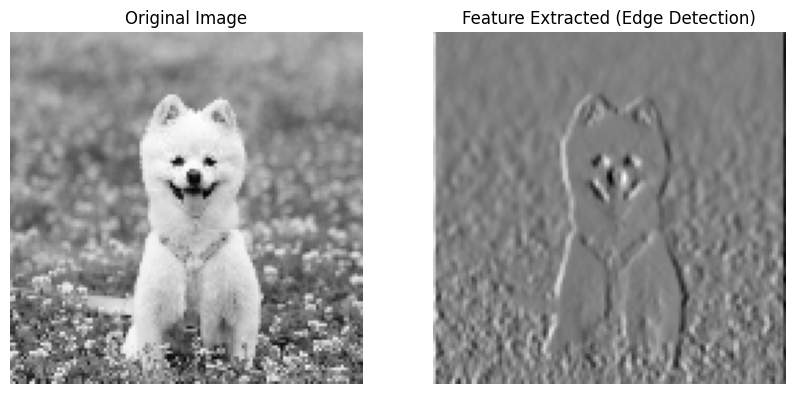

합성곱 연산 결과 (Edge Detection):
 [[ 1.9019608   0.09019607  0.05098039 ...  0.0078432   0.00392151
  -1.8666668 ]
 [ 2.5176473   0.09803915  0.07058817 ... -0.01176476  0.02352947
  -2.4627452 ]
 [ 2.4784315   0.07843143  0.10196084 ... -0.02745098  0.00784308
  -2.4588237 ]
 ...
 [ 2.0509806  -0.39215693 -0.4        ...  0.56470585  0.0039216
  -1.7137254 ]
 [ 1.8431373  -0.82745105  0.02352941 ...  0.54117644 -0.30196077
  -1.509804  ]
 [ 1.7098039  -1.2313726  -0.20784307 ...  0.13333336 -0.47450978
  -0.9764706 ]]


In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 이미지 로드 (경로 수정 필요)
image_path = "dog.png"  # 로컬 이미지 경로를 여기에 입력하세요
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # 흑백 변환

# 이미지 크기 조정 (옵션)
image = cv2.resize(image, (128, 128))  # 원하는 크기로 변경

# 정규화 (0~1 범위로 조정)
image = image.astype(np.float32) / 255.0

# CNN 입력 형태로 변환 (배치 차원 및 채널 차원 추가)
input_tensor = tf.constant(image.reshape(1, image.shape[0], image.shape[1], 1))

# 필터 (엣지 감지 필터 - Sobel 필터)
sobel_filter = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32).reshape(3, 3, 1, 1)  # (커널 높이, 너비, 입력 채널, 출력 채널)

# Tensor 변환
filter_tensor = tf.constant(sobel_filter)

# 합성곱 연산 (패딩 'SAME'으로 원본 크기 유지)
conv_result = tf.nn.conv2d(input_tensor, filter_tensor, strides=[1, 1, 1, 1], padding='SAME')

# 결과를 numpy 배열로 변환
output_image = conv_result.numpy().squeeze()

# 시각화
plt.figure(figsize=(10, 5))

# 원본 이미지 표시
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# 합성곱 결과 (특징 맵) 표시
plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title("Feature Extracted (Edge Detection)")
plt.axis('off')

plt.show()

# 출력 데이터 확인
print("합성곱 연산 결과 (Edge Detection):\n", output_image)